In [1]:
import pandas as pd
df = pd.read_csv("datasets/reddit_cleaned.csv")

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Apply VADER to raw text column
df['vader_score'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['vader_score'].apply(classify_sentiment)

# Convert datetime and extract date for trend analysis
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date

df.to_csv('datasets/reddit_with_sentiment.csv', index=False)
print("reddit_with_sentiment.csv")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harvey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


reddit_with_sentiment.csv


C:\Users\Harvey\AppData\Local\Temp\ipykernel_11956\3889360407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='pastel')


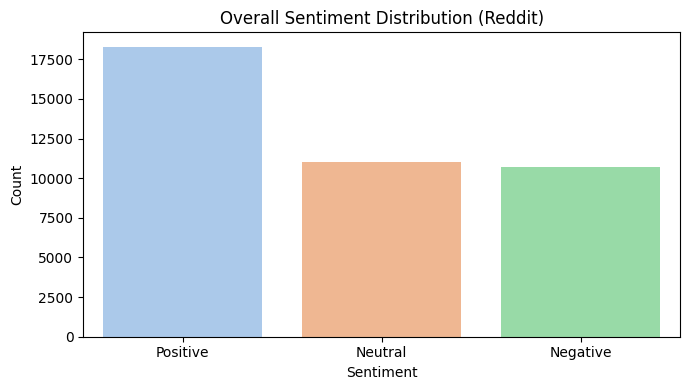

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='pastel')
plt.title("Overall Sentiment Distribution (Reddit)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

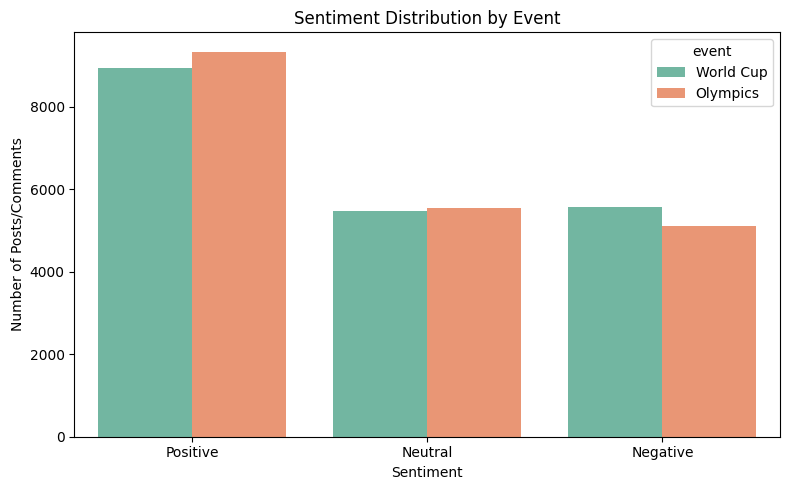

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', hue='event', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title("Sentiment Distribution by Event")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts/Comments")
plt.tight_layout()
plt.show()


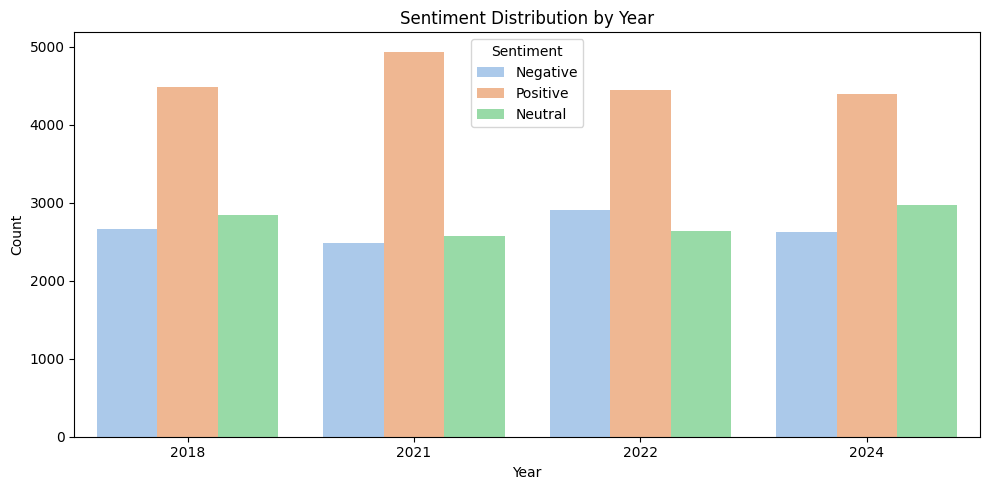

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='sentiment', order=sorted(df['year'].unique()), palette='pastel')
plt.title("Sentiment Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

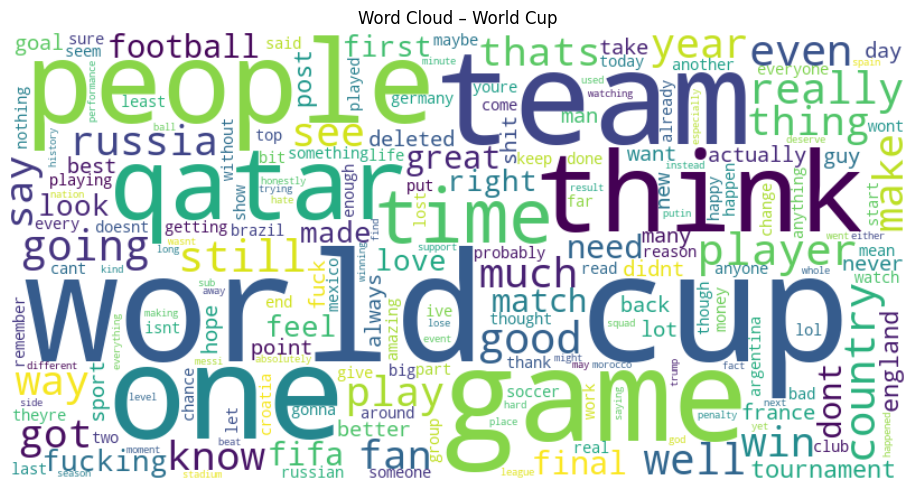

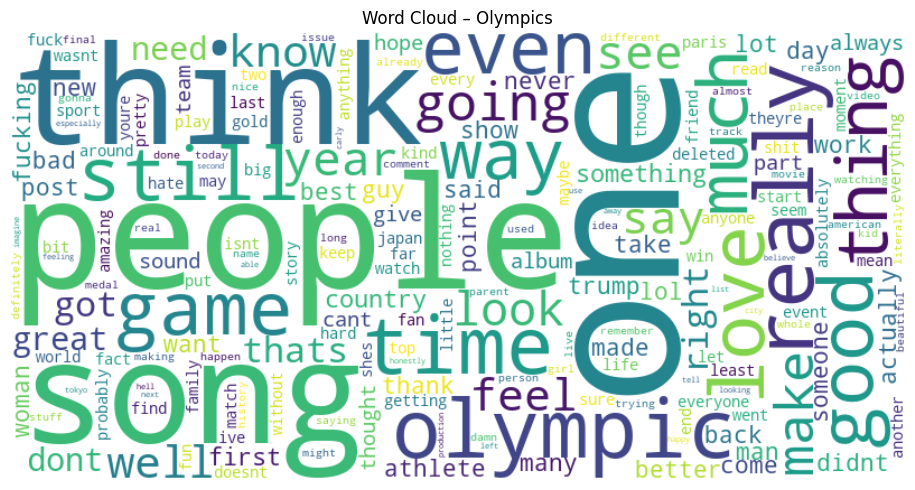

In [6]:
from wordcloud import WordCloud

for event in df['event'].dropna().unique():
    event_text = ' '.join(df[df['event'] == event]['clean_text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(event_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – {event}")
    plt.tight_layout()
    plt.show()


       event  vader_score
0   Olympics     0.142080
1  World Cup     0.120664


C:\Users\Harvey\AppData\Local\Temp\ipykernel_11956\3455311256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores, x='event', y='vader_score', palette='muted')


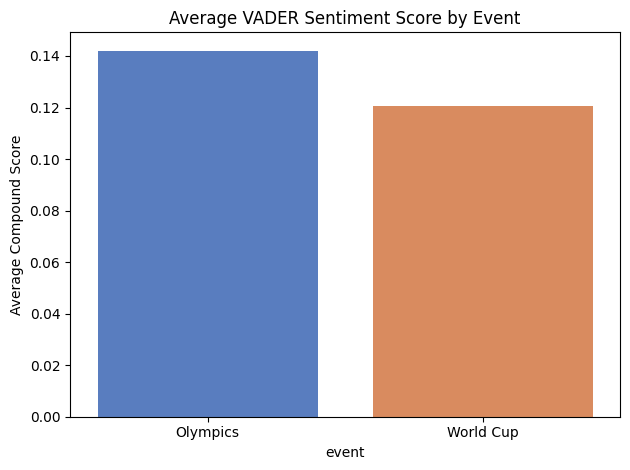

In [7]:
avg_scores = df.groupby('event')['vader_score'].mean().reset_index()
print(avg_scores)

sns.barplot(data=avg_scores, x='event', y='vader_score', palette='muted')
plt.title("Average VADER Sentiment Score by Event")
plt.ylabel("Average Compound Score")
plt.tight_layout()
plt.show()


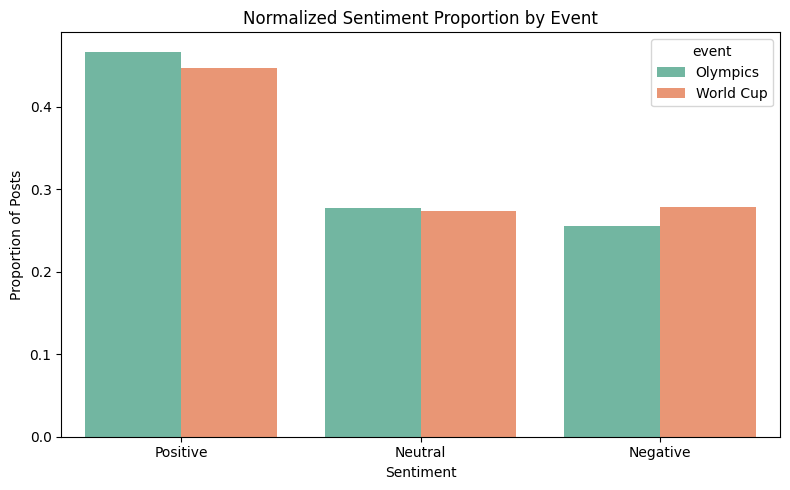

In [8]:
# Group and count sentiment per event
sentiment_counts = df.groupby(['event', 'sentiment']).size().reset_index(name='count')

# Normalize using transform (fixes the error)
sentiment_counts['proportion'] = sentiment_counts.groupby('event')['count'].transform(lambda x: x / x.sum())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sentiment_counts,
    x='sentiment',
    y='proportion',
    hue='event',
    order=['Positive', 'Neutral', 'Negative'],
    palette='Set2'
)
plt.title("Normalized Sentiment Proportion by Event")
plt.ylabel("Proportion of Posts")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


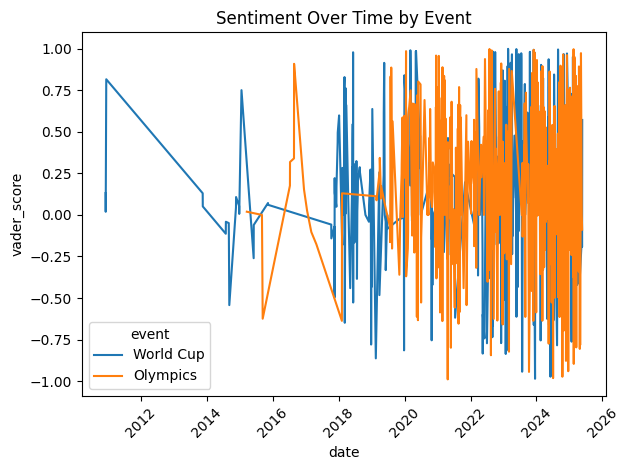

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date
timeline = df.groupby(['date', 'event'])['vader_score'].mean().reset_index()

sns.lineplot(data=timeline, x='date', y='vader_score', hue='event')
plt.title("Sentiment Over Time by Event")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()